In [2]:
# Step 0: Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Styling
sns.set(style="whitegrid")

In [4]:
# Load from CSV (update path)
df = pd.read_csv(r"C:\Users\CA Mahesh Vyas\Downloads\superstore_sales_dataset.csv", encoding='latin1')

# Show basic info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [6]:
# Drop rows with null dates
df = df.dropna(subset=['Order Date'])

In [7]:
# Add Order_Month column
df['Order_Month'] = df['Order Date'].dt.to_period('M').astype(str)

In [8]:
# Simulate Inventory Days (random or assumed)
import numpy as np
np.random.seed(42)
df['Inventory_Days'] = np.random.randint(10, 60, size=len(df))  # synthetic

In [9]:
# Calculate profitability ratio
df['Profit_Margin_%'] = (df['Profit'] / df['Sales']) * 100

In [10]:
print(df)

      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08  11-11-2016    Second Class   
1          2  CA-2016-152156 2016-11-08  11-11-2016    Second Class   
2          3  CA-2016-138688 2016-06-12   6/16/2016    Second Class   
3          4  US-2015-108966 2015-10-11  10/18/2015  Standard Class   
4          5  US-2015-108966 2015-10-11  10/18/2015  Standard Class   
...      ...             ...        ...         ...             ...   
9978    9979  US-2016-103674 2016-12-06  12-10-2016  Standard Class   
9979    9980  US-2016-103674 2016-12-06  12-10-2016  Standard Class   
9980    9981  US-2015-151435 2015-09-06  09-09-2015    Second Class   
9981    9982  CA-2017-163566 2017-08-03  08-06-2017     First Class   
9993    9994  CA-2017-119914 2017-05-04  05-09-2017    Second Class   

     Customer ID    Customer Name      Segment        Country  \
0       CG-12520      Claire Gute     Consumer  United States   
1       CG-12520 

In [11]:
# Select relevant columns
corr_data = df[['Sales', 'Profit', 'Inventory_Days', 'Profit_Margin_%']]

In [12]:
# Correlation matrix
corr_matrix = corr_data.corr()
print(corr_matrix)

                    Sales    Profit  Inventory_Days  Profit_Margin_%
Sales            1.000000  0.533888        0.002668         0.001646
Profit           0.533888  1.000000       -0.010203         0.239575
Inventory_Days   0.002668 -0.010203        1.000000         0.030310
Profit_Margin_%  0.001646  0.239575        0.030310         1.000000


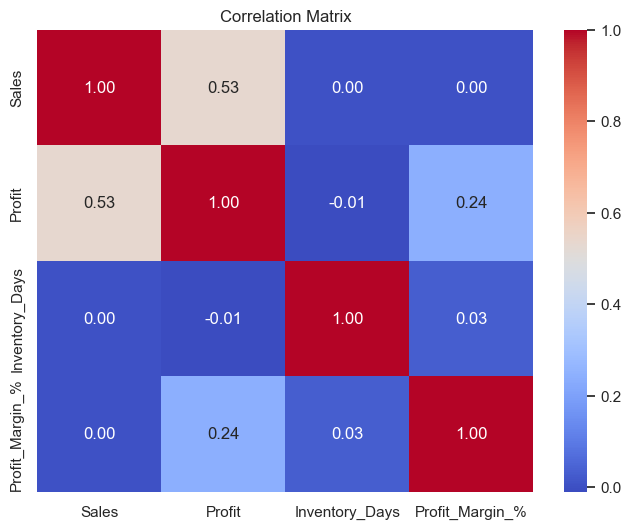

In [13]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

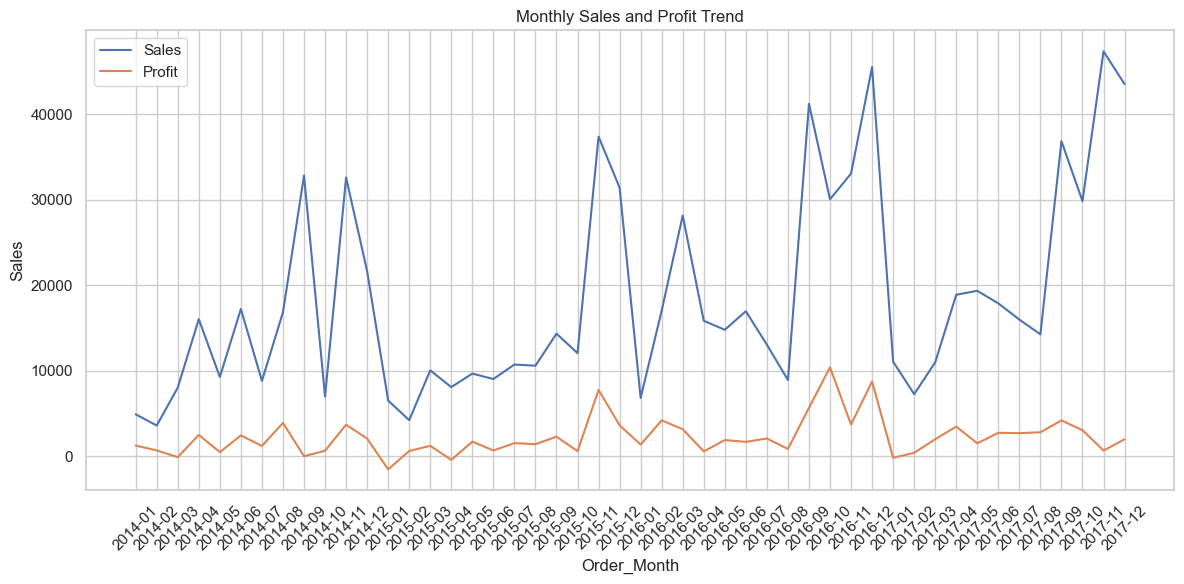

In [14]:
monthly_trends = df.groupby('Order_Month')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trends, x='Order_Month', y='Sales', label='Sales')
sns.lineplot(data=monthly_trends, x='Order_Month', y='Profit', label='Profit')
plt.xticks(rotation=45)
plt.title("Monthly Sales and Profit Trend")
plt.tight_layout()
plt.show()

C:\Users\CA Mahesh Vyas\AppData\Local\Temp\ipykernel_6132\1818302773.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss_df, x='Profit', y='Sub-Category', palette='Reds_r')


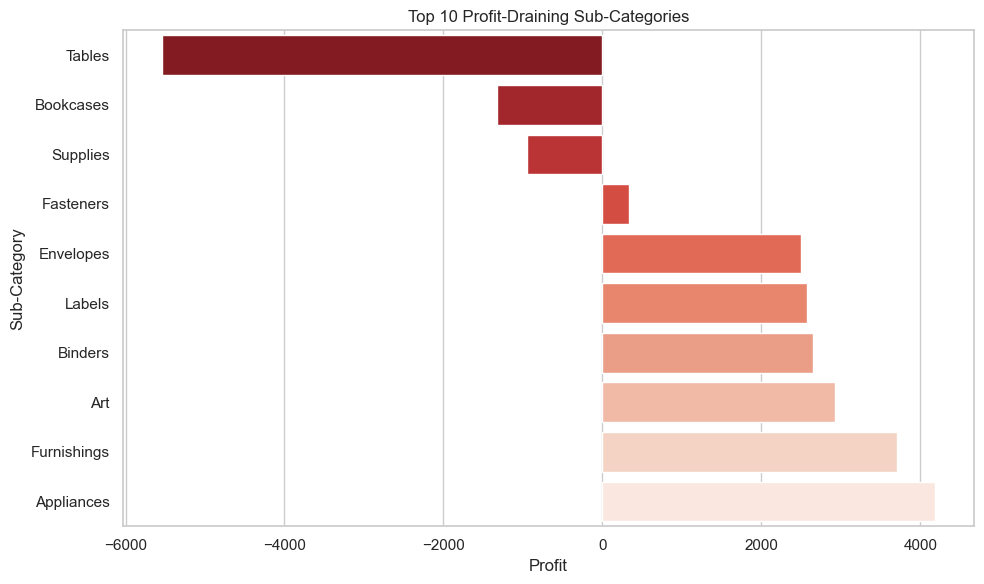

In [15]:
loss_df = df.groupby('Sub-Category')['Profit'].sum().reset_index()
loss_df = loss_df.sort_values('Profit').head(10)  # bottom 10

plt.figure(figsize=(10,6))
sns.barplot(data=loss_df, x='Profit', y='Sub-Category', palette='Reds_r')
plt.title("Top 10 Profit-Draining Sub-Categories")
plt.tight_layout()
plt.show()

In [21]:
df.to_csv("clean_superstore.csv", index=False)